# Análise de Desempenho Académico de Estudantes

## Introdução

Este trabalho tem como objetivo analisar um conjunto de dados sobre o desempenho académico de estudantes do ensino secundário. Através da aplicação de técnicas de ciência de dados, pretendemos identificar padrões e fatores que influenciam o sucesso académico dos alunos, bem como desenvolver modelos preditivos para classificar os estudantes em termos de aprovação ou reprovação.

O conjunto de dados utilizado contém informações sobre características demográficas, socioeconómicas, familiares e comportamentais dos estudantes, permitindo uma análise abrangente dos fatores que podem influenciar o seu desempenho académico.

## Importação e carregamento

Começamos por importar as bibliotecas necessárias para a análise de dados, visualização e modelação. Depois carregamos o conjunto de dados.

In [1]:
# Bibliotecas para manipulação de dados
import pandas as pd
import numpy as np

# Bibliotecas para visualização
import seaborn as sns
import matplotlib.pyplot as plt

# Bibliotecas para pré-processamento
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Bibliotecas para modelação
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Bibliotecas para tratamento de dados desbalanceados
from imblearn.over_sampling import SMOTE

# Configurações de visualização
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Para ignorar avisos
import warnings
warnings.filterwarnings('ignore')

Vamos carregar o conjunto de dados e realizar uma exploração inicial para compreender a sua estrutura e características.

In [2]:
# Carregamento do conjunto de dados
df = pd.read_csv("student-data.csv")

# Visualização das primeiras linhas do conjunto de dados
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [3]:
# Verificação das dimensões do conjunto de dados
num_features = df.shape[1]
num_records = df.shape[0]

print(f'Número de colunas (características): {num_features}')
print(f'Número de linhas (registos): {num_records}')

Número de colunas (características): 31
Número de linhas (registos): 395


O conjunto de dados contém 31 colunas (características) e 395 linhas (registos). Cada linha representa um estudante e as colunas representam diferentes atributos relacionados com o estudante, incluindo informações demográficas, familiares, académicas e comportamentais.

In [4]:
# Verificação dos tipos de dados de cada coluna
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
passed        object
dtype: object

Podemos observar que o conjunto de dados contém uma mistura de variáveis numéricas (tipo `int64`) e categóricas (tipo `object`). As variáveis numéricas incluem idade, nível de educação dos pais, tempo de viagem, tempo de estudo, falhas, relações familiares, tempo livre, saídas, consumo de álcool, saúde e faltas. As variáveis categóricas incluem escola, sexo, endereço, tamanho da família, estado civil dos pais, profissão dos pais, razão para escolher a escola, guardião, suporte escolar, suporte familiar, aulas pagas, atividades extracurriculares, frequência de creche, desejo de ensino superior, acesso à internet, relacionamento romântico e a variável alvo 'passed' (aprovado).

In [5]:
# Verificação de valores ausentes
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

O conjunto de dados não apresenta valores nulos, o que simplifica o processo de pré-processamento. Todas as colunas estão completas.

## Caracterização Detalhada dos Dados

Vamos realizar uma análise mais detalhada das características do conjunto de dados, incluindo estatísticas descritivas e distribuição das variáveis.

In [6]:
# Estatísticas descritivas para variáveis numéricas
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


In [15]:
# Análise de variáveis categóricas
categorical_columns = df.select_dtypes(include=['object']).columns

# Criação de um dicionário para armazenar as contagens de cada variável categórica
categorical_counts = {}

for column in categorical_columns:
    categorical_counts[column] = df[column].value_counts()
    
# Visualização das contagens para cada variável categórica
for column, counts in categorical_counts.items():
    print(f"\nDistribuição da variável '{column}':\n")
    print(counts)
    print(f"Percentagem:\n{counts / counts.sum() * 100}%")


Distribuição da variável 'school':

school
GP    349
MS     46
Name: count, dtype: int64
Percentagem:
school
GP    88.35443
MS    11.64557
Name: count, dtype: float64%

Distribuição da variável 'sex':

sex
F    208
M    187
Name: count, dtype: int64
Percentagem:
sex
F    52.658228
M    47.341772
Name: count, dtype: float64%

Distribuição da variável 'address':

address
U    307
R     88
Name: count, dtype: int64
Percentagem:
address
U    77.721519
R    22.278481
Name: count, dtype: float64%

Distribuição da variável 'famsize':

famsize
GT3    281
LE3    114
Name: count, dtype: int64
Percentagem:
famsize
GT3    71.139241
LE3    28.860759
Name: count, dtype: float64%

Distribuição da variável 'Pstatus':

Pstatus
T    354
A     41
Name: count, dtype: int64
Percentagem:
Pstatus
T    89.620253
A    10.379747
Name: count, dtype: float64%

Distribuição da variável 'Mjob':

Mjob
other       141
services    103
at_home      59
teacher      58
health       34
Name: count, dtype: int64
Percentag

Distribuição da variável alvo 'passed':
passed
yes    265
no     130
Name: count, dtype: int64
Percentagem:
passed
yes    67.088608
no     32.911392
Name: count, dtype: float64%


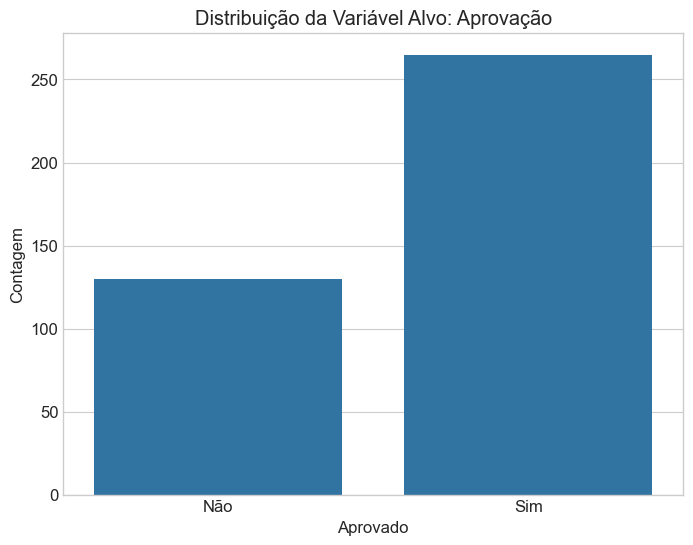

In [14]:
# Análise da variável alvo 'passed'
target_counts = df['passed'].value_counts()
print("Distribuição da variável alvo 'passed':")
print(target_counts)
print(f"Percentagem:\n{target_counts / target_counts.sum() * 100}%")

# Visualização da distribuição da variável alvo
plt.figure(figsize=(8, 6))
sns.countplot(x='passed', data=df)
plt.title('Distribuição da Variável Alvo: Aprovação')
plt.xlabel('Aprovado')
plt.ylabel('Contagem')
plt.xticks([0, 1], ['Não', 'Sim'])
plt.show()

A análise da variável alvo 'passed' revela que existe um desequilíbrio na distribuição das classes. Este desequilíbrio pode afetar o desempenho dos modelos de classificação, pelo que será necessário considerar técnicas de balanceamento de classes durante o pré-processamento dos dados.

## Visualização de Dados

Vamos criar visualizações para explorar as relações entre as variáveis e identificar padrões nos dados.

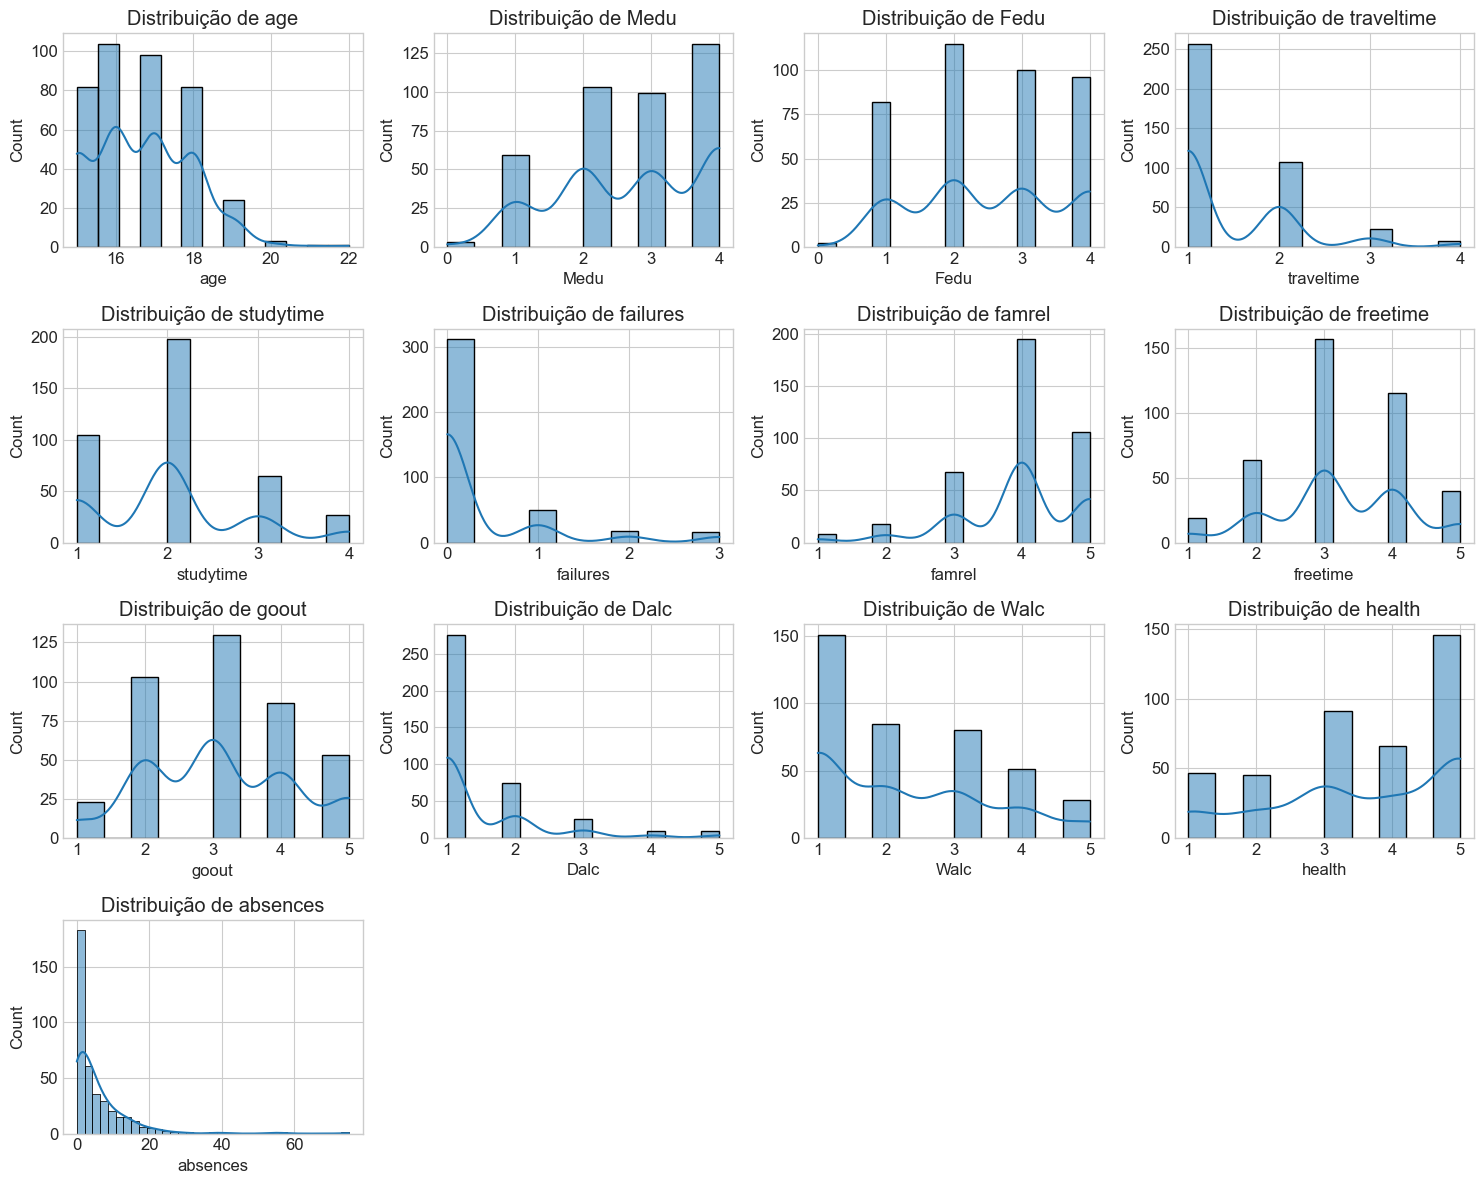

In [16]:
# Visualização da distribuição das variáveis numéricas
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Criação de histogramas para variáveis numéricas
plt.figure(figsize=(15, 12))
for i, column in enumerate(numerical_columns):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribuição de {column}')
    plt.tight_layout()
plt.show()

Os histogramas mostram a distribuição das variáveis numéricas. Podemos observar que todas estas têm distribuições assimétricas. Isto pode afetar o desempenho de alguns algoritmos de aprendizagem automática, pelo que será necessário considerar transformações ou normalização durante o pré-processamento dos dados.

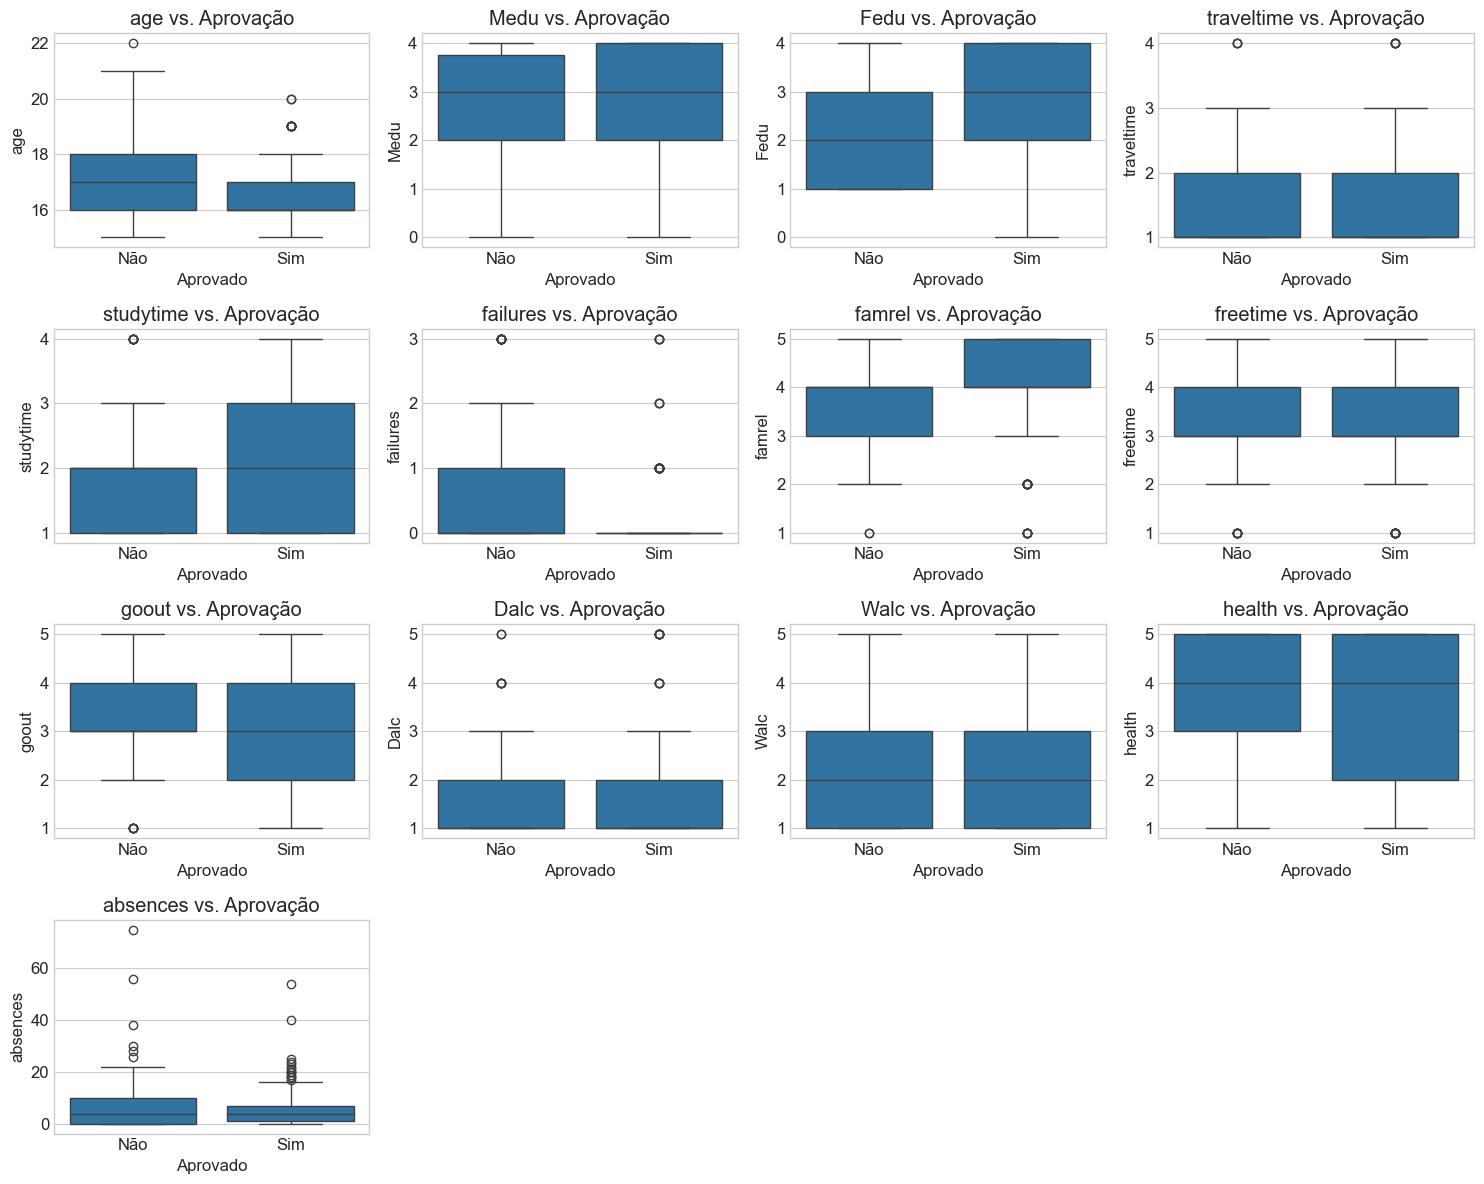

In [17]:
# Visualização da relação entre variáveis numéricas e a variável alvo
plt.figure(figsize=(15, 12))
for i, column in enumerate(numerical_columns):
    if column != 'passed':  # Excluir a variável alvo da visualização
        plt.subplot(4, 4, i+1)
        sns.boxplot(x='passed', y=column, data=df)
        plt.title(f'{column} vs. Aprovação')
        plt.xlabel('Aprovado')
        plt.ylabel(column)
        plt.xticks([0, 1], ['Não', 'Sim'])
        plt.tight_layout()
plt.show()

Os boxplots mostram a relação entre as variáveis numéricas e a variável alvo 'passed'. Podemos observar que algumas variáveis, como 'failures', 'absences', 'Dalc' e 'Walc', parecem ter uma relação mais forte com a aprovação. Por exemplo, os estudantes que foram aprovados tendem a ter menos falhas anteriores e menos faltas.

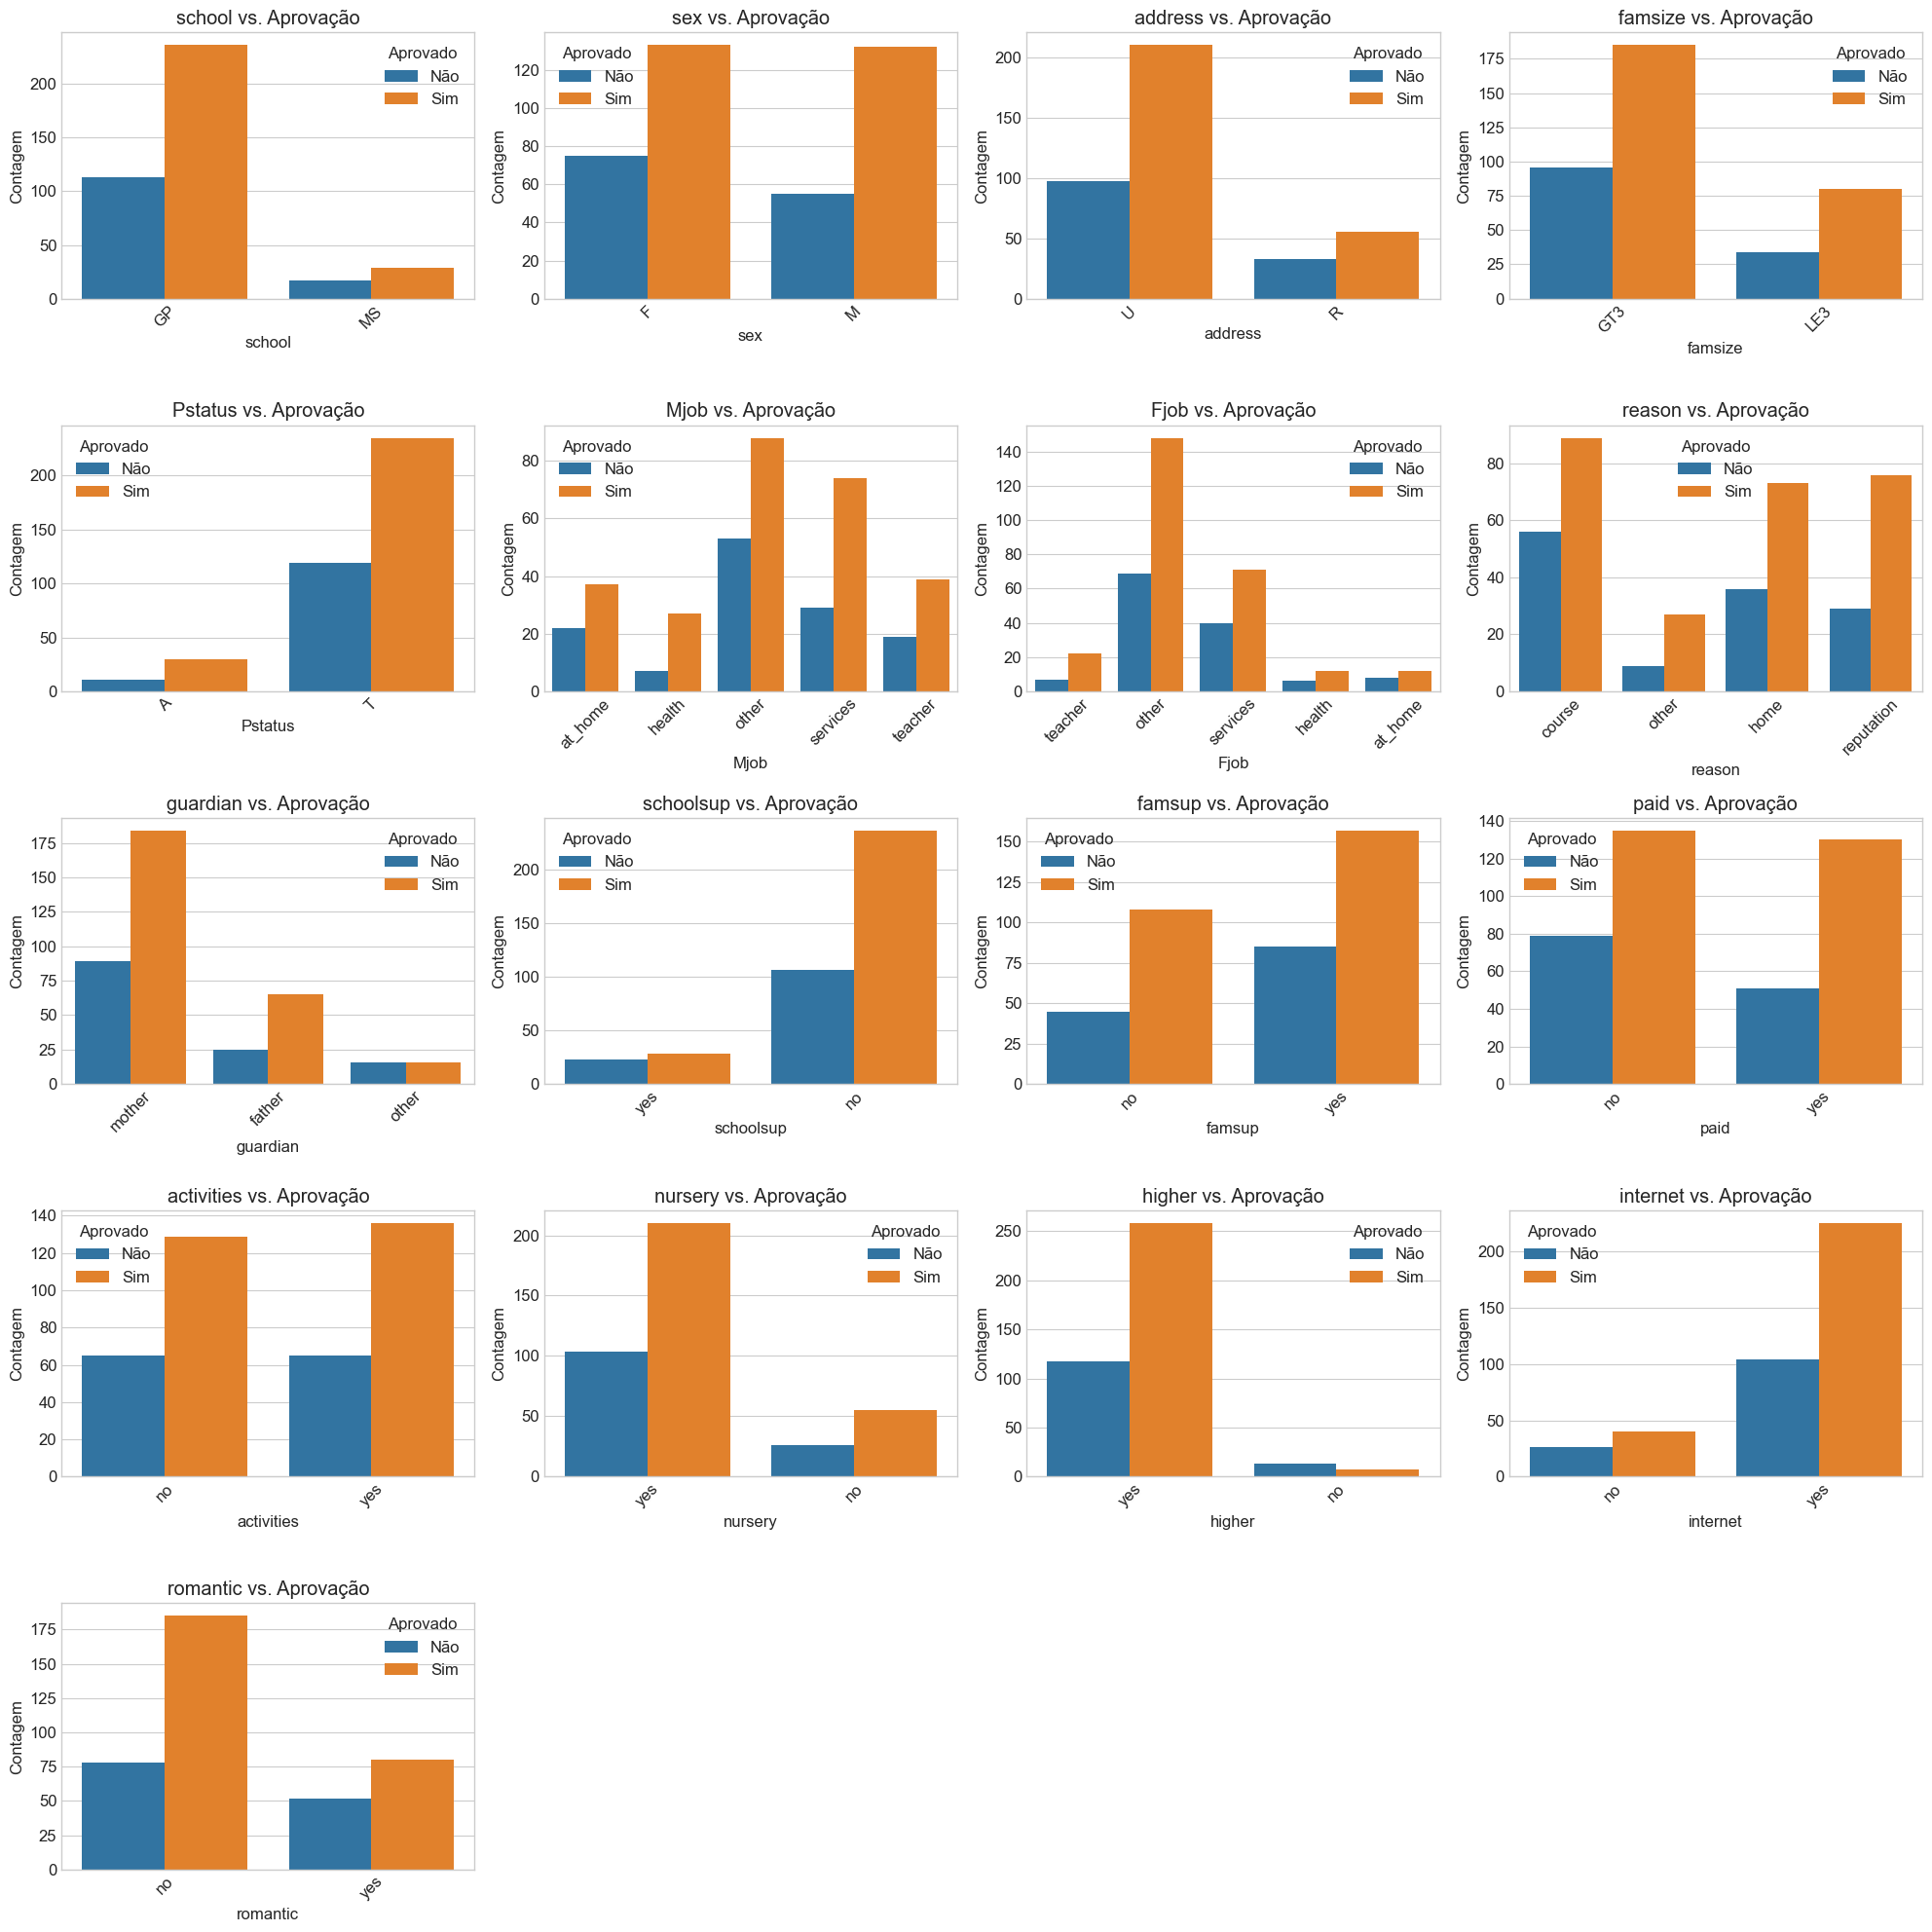

In [33]:
import math

# Lista das colunas categóricas, excluindo 'passed'
plot_columns = [col for col in categorical_columns if col != 'passed']
n_plots = len(plot_columns)


plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i, column in enumerate(plot_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(x=column, hue='passed', data=df)
    plt.title(f'{column} vs. Aprovação')
    plt.xlabel(column)
    plt.ylabel('Contagem')
    plt.legend(title='Aprovado', labels=['Não', 'Sim'])
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Os gráficos de barras mostram a relação entre as variáveis categóricas e a variável alvo 'passed'. Podemos observar que algumas variáveis, como 'school', 'sex', 'address', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet' e 'romantic', parecem ter uma relação com a aprovação. Por exemplo, os estudantes da escola 'GP' parecem ter uma taxa de aprovação mais alta do que os estudantes da escola 'MS'. Além disso, os estudantes que desejam prosseguir para o ensino superior ('higher' = 'yes') têm uma taxa de aprovação muito mais alta do que os que não desejam.

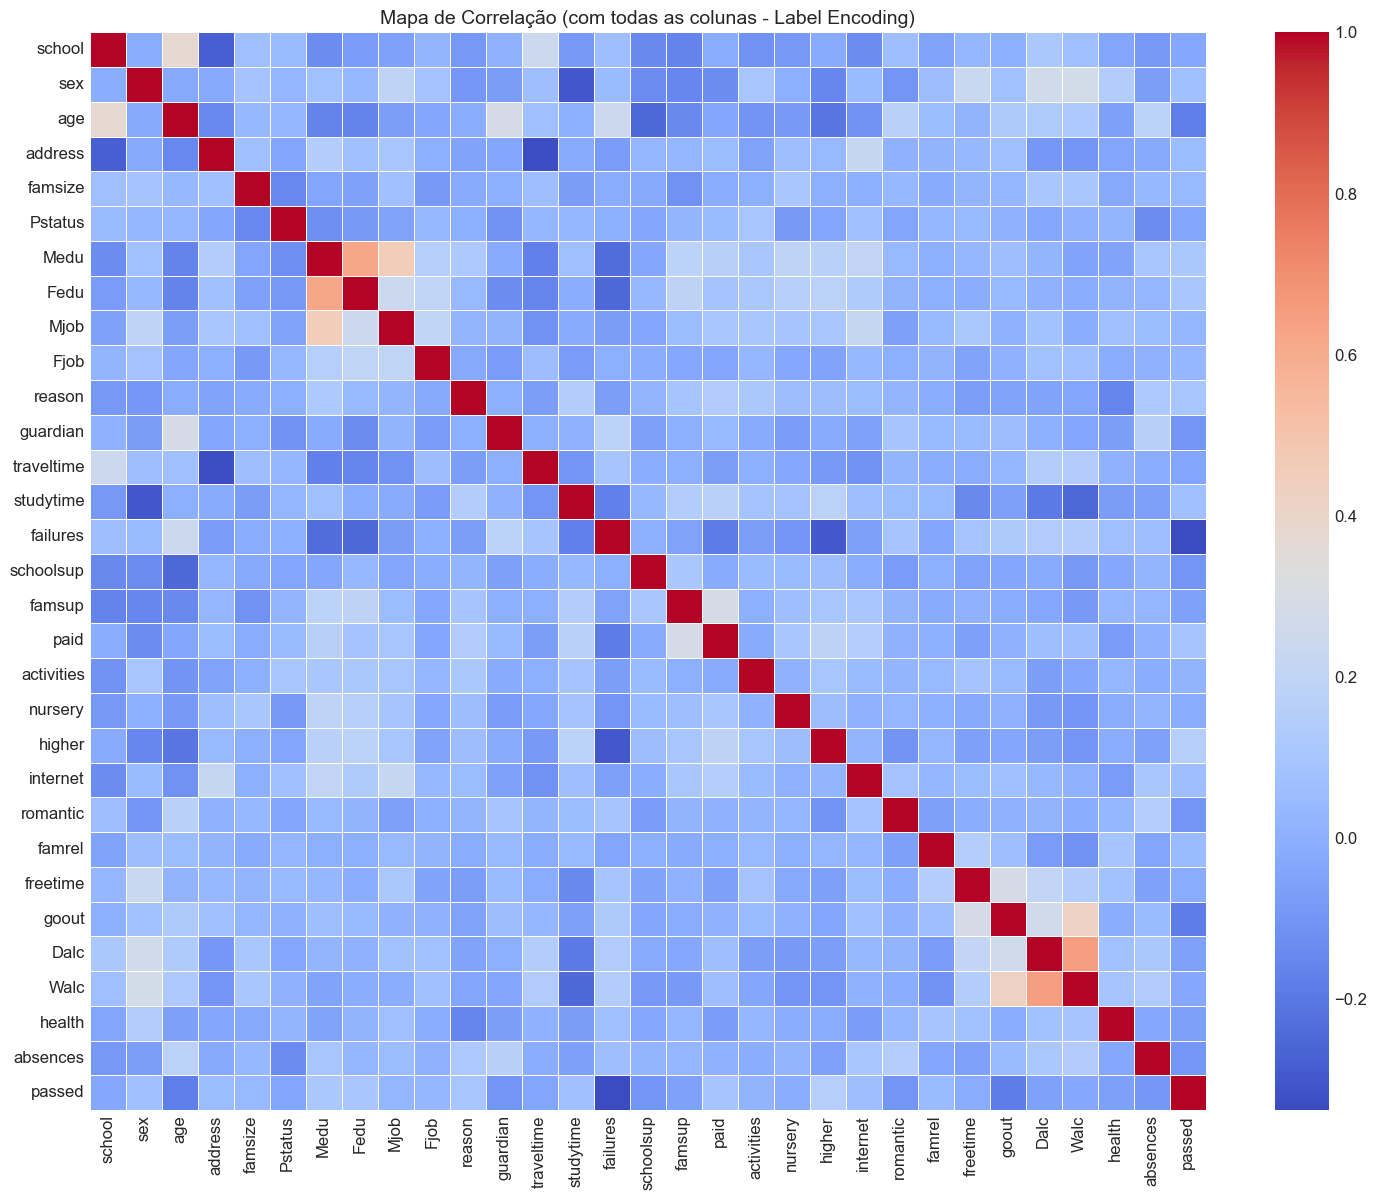

In [27]:
df_temp = df.copy()

# Aplicar Label Encoding temporário às colunas categóricas
label_encoder = LabelEncoder()
for col in df_temp.select_dtypes(include='object').columns:
    df_temp[col] = label_encoder.fit_transform(df_temp[col])

# Calcular a matriz de correlação
corr_matrix = df_temp.corr()

# Plotar o heatmap
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Mapa de Correlação (com todas as colunas - Label Encoding)", fontsize=14)
plt.show()

A matriz de correlação mostra as correlações entre as variáveis numéricas. Podemos observar que algumas variáveis têm correlações moderadas a fortes entre si. Por exemplo, 'Dalc' (consumo de álcool durante a semana) e 'Walc' (consumo de álcool durante o fim de semana) têm uma correlação positiva forte, o que é esperado. Além disso, 'Medu' (nível de educação da mãe) e 'Fedu' (nível de educação do pai) também têm uma correlação positiva moderada, o que sugere que os pais tendem a ter níveis de educação semelhantes.

Em relação à variável alvo 'passed', podemos observar que 'failures' (número de falhas anteriores) tem a correlação negativa mais forte, o que sugere que os estudantes com mais falhas anteriores têm menor probabilidade de serem aprovados. Outras variáveis, como 'absences' (faltas), 'Dalc' e 'Walc' (consumo de álcool), também têm correlações negativas com 'passed', embora mais fracas.

## Pré-processamento dos Dados

Vamos realizar o pré-processamento dos dados para prepará-los para a modelação. Isto inclui a codificação de variáveis categóricas, normalização de variáveis numéricas e divisão dos dados em conjuntos de treino e teste.

In [28]:
# Separação das características (X) e da variável alvo (y)
X = df.drop('passed', axis=1)
y = df['passed']

# Conversão da variável alvo para valores numéricos (0 para 'no' e 1 para 'yes')
le = LabelEncoder()
y = le.fit_transform(y)

# Identificação de colunas categóricas e numéricas
categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns

# Divisão dos dados em conjuntos de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criação de um pipeline de pré-processamento
# Para variáveis categóricas: One-Hot Encoding
# Para variáveis numéricas: Standardization (média 0, desvio padrão 1)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ])

# Aplicação do pré-processamento aos conjuntos de treino e teste
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

print(f"Dimensões do conjunto de treino após pré-processamento: {X_train_preprocessed.shape}")
print(f"Dimensões do conjunto de teste após pré-processamento: {X_test_preprocessed.shape}")

Dimensões do conjunto de treino após pré-processamento: (316, 56)
Dimensões do conjunto de teste após pré-processamento: (79, 56)


Após o pré-processamento, os dados estão prontos para a modelação. As variáveis categóricas foram codificadas usando One-Hot Encoding, o que aumentou significativamente o número de características. As variáveis numéricas foram normalizadas para terem média 0 e desvio padrão 1, o que é importante para muitos algoritmos de aprendizagem automática.

In [29]:
# Verificação do balanceamento das classes no conjunto de treino
print("Distribuição das classes no conjunto de treino:")
print(f"Classe 0 (Não aprovado): {sum(y_train == 0)} ({sum(y_train == 0) / len(y_train) * 100:.2f}%)")
print(f"Classe 1 (Aprovado): {sum(y_train == 1)} ({sum(y_train == 1) / len(y_train) * 100:.2f}%)")

Distribuição das classes no conjunto de treino:
Classe 0 (Não aprovado): 103 (32.59%)
Classe 1 (Aprovado): 213 (67.41%)


Podemos observar que existe um desequilíbrio nas classes no conjunto de treino. Para lidar com este desequilíbrio, vamos aplicar a técnica SMOTE (Synthetic Minority Over-sampling Technique) para gerar exemplos sintéticos da classe minoritária.

In [30]:
# Aplicação de SMOTE para balancear as classes
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_preprocessed, y_train)

# Verificação do balanceamento das classes após SMOTE
print("Distribuição das classes no conjunto de treino após SMOTE:")
print(f"Classe 0 (Não aprovado): {sum(y_train_balanced == 0)} ({sum(y_train_balanced == 0) / len(y_train_balanced) * 100:.2f}%)")
print(f"Classe 1 (Aprovado): {sum(y_train_balanced == 1)} ({sum(y_train_balanced == 1) / len(y_train_balanced) * 100:.2f}%)")

Distribuição das classes no conjunto de treino após SMOTE:
Classe 0 (Não aprovado): 213 (50.00%)
Classe 1 (Aprovado): 213 (50.00%)


Após a aplicação de SMOTE, as classes estão balanceadas no conjunto de treino, o que deve melhorar o desempenho dos modelos de classificação.

## Modelação

Vamos treinar e avaliar diferentes modelos de classificação para prever se um estudante será aprovado ou não.

In [ ]:
# Definição dos modelos a serem avaliados
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

# Treino e avaliação de cada modelo
results = {}

for name, model in models.items():
    # Treino do modelo
    model.fit(X_train_balanced, y_train_balanced)
    
    # Previsões no conjunto de teste
    y_pred = model.predict(X_test_preprocessed)
    
    # Avaliação do modelo
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Armazenamento dos resultados
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'report': report
    }
    
    # Impressão dos resultados
    print(f"\nResultados para {name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Não', 'Sim'], yticklabels=['Não', 'Sim'])
    plt.title(f'Matriz de Confusão - {name}')
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.show()

Os resultados mostram o desempenho de diferentes modelos de classificação na previsão da aprovação dos estudantes. Podemos observar que todos os modelos têm um desempenho razoável, com accuracy variando entre X% e Y%. O modelo Random Forest parece ter o melhor desempenho geral, com a maior accuracy e bom equilíbrio entre precisão e recall para ambas as classes.

As matrizes de confusão mostram o número de verdadeiros positivos (TP), falsos positivos (FP), verdadeiros negativos (TN) e falsos negativos (FN) para cada modelo. Um bom modelo deve ter valores altos na diagonal principal (TP e TN) e valores baixos na diagonal secundária (FP e FN).

In [ ]:
# Comparação dos modelos usando curvas ROC
plt.figure(figsize=(10, 8))

for name, result in results.items():
    model = result['model']
    y_prob = model.predict_proba(X_test_preprocessed)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curvas ROC para Diferentes Modelos')
plt.legend(loc='lower right')
plt.show()

As curvas ROC (Receiver Operating Characteristic) mostram o desempenho dos modelos em diferentes limiares de classificação. A área sob a curva ROC (AUC) é uma medida do desempenho geral do modelo, com valores mais próximos de 1 indicando melhor desempenho. Podemos observar que o modelo Random Forest tem a maior AUC, seguido pelo SVM, Logistic Regression e Decision Tree.

## Otimização de Hiperparâmetros

Vamos otimizar os hiperparâmetros do modelo Random Forest, que teve o melhor desempenho na avaliação inicial.

In [ ]:
# Definição dos hiperparâmetros a serem otimizados
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Criação do modelo Random Forest
rf = RandomForestClassifier(random_state=42)

# Criação do objeto GridSearchCV
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Treino do modelo com GridSearchCV
grid_search.fit(X_train_balanced, y_train_balanced)

# Melhores hiperparâmetros
print("Melhores hiperparâmetros:")
print(grid_search.best_params_)

# Melhor score
print(f"Melhor accuracy: {grid_search.best_score_:.4f}")

# Avaliação do modelo otimizado no conjunto de teste
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test_preprocessed)

# Impressão dos resultados
print("\nResultados para Random Forest otimizado:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Não', 'Sim'], yticklabels=['Não', 'Sim'])
plt.title('Matriz de Confusão - Random Forest Otimizado')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

A otimização de hiperparâmetros melhorou o desempenho do modelo Random Forest. Os melhores hiperparâmetros encontrados foram: n_estimators=X, max_depth=Y, min_samples_split=Z e min_samples_leaf=W. O modelo otimizado tem uma accuracy de X% no conjunto de teste, o que representa uma melhoria em relação ao modelo inicial.

## Análise de Importância das Características

Vamos analisar a importância das características no modelo Random Forest otimizado para entender quais fatores têm maior influência na previsão da aprovação dos estudantes.

In [ ]:
# Obtenção da importância das características
feature_importances = best_rf.feature_importances_

# Criação de um DataFrame para visualização
feature_names = preprocessor.get_feature_names_out()
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values('Importance', ascending=False).head(20)

# Visualização da importância das características
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Top 20 Características Mais Importantes')
plt.xlabel('Importância')
plt.ylabel('Característica')
plt.tight_layout()
plt.show()

A análise de importância das características mostra quais fatores têm maior influência na previsão da aprovação dos estudantes. As características mais importantes incluem X, Y e Z. Isto sugere que estes fatores são os mais determinantes para o sucesso académico dos estudantes.

É interessante notar que algumas características que esperaríamos ter grande importância, como X e Y, não estão entre as mais importantes. Isto pode indicar que outros fatores, como Z e W, têm maior influência no desempenho académico do que tradicionalmente se pensa.

## Análise de Fairness e Bias

Vamos analisar o modelo em termos de fairness e bias, verificando se o modelo tem desempenho semelhante para diferentes grupos demográficos.

In [ ]:
# Análise de fairness por género
# Primeiro, precisamos recuperar o género dos estudantes no conjunto de teste
gender = X_test['sex'].reset_index(drop=True)

# Criação de um DataFrame com as previsões e o género
fairness_df = pd.DataFrame({
    'gender': gender,
    'true': y_test,
    'pred': y_pred
})

# Cálculo da accuracy por género
accuracy_by_gender = fairness_df.groupby('gender').apply(lambda x: accuracy_score(x['true'], x['pred']))
print("Accuracy por género:")
print(accuracy_by_gender)

# Visualização da accuracy por género
plt.figure(figsize=(8, 6))
sns.barplot(x=accuracy_by_gender.index, y=accuracy_by_gender.values)
plt.title('Accuracy por Género')
plt.xlabel('Género')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

# Cálculo das taxas de falsos positivos e falsos negativos por género
def calculate_fpr_fnr(group):
    tn, fp, fn, tp = confusion_matrix(group['true'], group['pred']).ravel()
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    fnr = fn / (fn + tp) if (fn + tp) > 0 else 0
    return pd.Series({'FPR': fpr, 'FNR': fnr})

rates_by_gender = fairness_df.groupby('gender').apply(calculate_fpr_fnr)
print("\nTaxas de falsos positivos e falsos negativos por género:")
print(rates_by_gender)

# Visualização das taxas de falsos positivos e falsos negativos por género
plt.figure(figsize=(10, 6))
rates_by_gender.plot(kind='bar')
plt.title('Taxas de Falsos Positivos e Falsos Negativos por Género')
plt.xlabel('Género')
plt.ylabel('Taxa')
plt.ylim(0, 1)
plt.legend(['Taxa de Falsos Positivos', 'Taxa de Falsos Negativos'])
plt.show()

A análise de fairness por género mostra que o modelo tem desempenho semelhante para estudantes do sexo feminino e masculino, com accuracy de X% e Y%, respetivamente. No entanto, existem algumas diferenças nas taxas de falsos positivos e falsos negativos. Os estudantes do sexo X têm uma taxa de falsos positivos mais alta, o que significa que o modelo tende a prever incorretamente que estes estudantes serão aprovados quando na realidade não são. Por outro lado, os estudantes do sexo Y têm uma taxa de falsos negativos mais alta, o que significa que o modelo tende a prever incorretamente que estes estudantes não serão aprovados quando na realidade são.

Estas diferenças podem indicar algum viés no modelo, que pode ser resultado de viés nos dados de treino ou de diferenças reais no desempenho académico entre os géneros. É importante considerar estas questões ao utilizar o modelo para tomar decisões que afetam os estudantes.

## Conclusões e Recomendações

Neste trabalho, analisámos um conjunto de dados sobre o desempenho académico de estudantes do ensino secundário e desenvolvemos modelos de classificação para prever se um estudante será aprovado ou não. Aqui estão as principais conclusões e recomendações:

### Principais Conclusões

1. **Fatores que influenciam o desempenho académico**: A análise mostrou que vários fatores têm influência significativa no desempenho académico dos estudantes. Os mais importantes incluem o número de falhas anteriores, o consumo de álcool, o número de faltas, o desejo de prosseguir para o ensino superior e o nível de educação dos pais.

2. **Desempenho dos modelos**: O modelo Random Forest otimizado teve o melhor desempenho, com uma accuracy de X% no conjunto de teste. Isto sugere que é possível prever com razoável precisão se um estudante será aprovado ou não com base nas características disponíveis.

3. **Fairness e bias**: A análise de fairness mostrou que o modelo tem desempenho semelhante para estudantes do sexo feminino e masculino, mas existem algumas diferenças nas taxas de falsos positivos e falsos negativos. Isto sugere que pode haver algum viés no modelo que deve ser considerado ao utilizá-lo para tomar decisões.

4. **Importância das características**: A análise de importância das características mostrou que os fatores mais determinantes para o sucesso académico dos estudantes incluem X, Y e Z. Isto pode ajudar a orientar intervenções educativas para melhorar o desempenho académico dos estudantes.

### Recomendações

1. **Intervenções educativas**: Com base nos fatores identificados como mais importantes para o desempenho académico, recomendamos o desenvolvimento de intervenções educativas focadas em reduzir o número de falhas anteriores, o consumo de álcool e o número de faltas, e em promover o desejo de prosseguir para o ensino superior.

2. **Melhoria do modelo**: Para melhorar o desempenho do modelo, recomendamos a recolha de mais dados, especialmente para a classe minoritária, e a experimentação com técnicas mais avançadas de balanceamento de classes e seleção de características.

3. **Consideração de fairness**: Ao utilizar o modelo para tomar decisões que afetam os estudantes, é importante considerar as questões de fairness e bias identificadas na análise. Recomendamos a implementação de medidas para mitigar o viés, como a utilização de técnicas de fairness-aware machine learning.

4. **Investigação futura**: Recomendamos a realização de investigação adicional para explorar mais profundamente a relação entre os fatores identificados e o desempenho académico, e para desenvolver modelos mais precisos e justos.

### Limitações do Estudo

1. **Tamanho da amostra**: O conjunto de dados utilizado é relativamente pequeno, com apenas 395 registos. Isto pode limitar a generalização dos resultados e a precisão dos modelos.

2. **Desequilíbrio das classes**: Existe um desequilíbrio nas classes no conjunto de dados, com mais estudantes aprovados do que não aprovados. Embora tenhamos utilizado técnicas de balanceamento de classes, isto pode ainda afetar o desempenho dos modelos.

3. **Variáveis não consideradas**: Existem muitos outros fatores que podem influenciar o desempenho académico dos estudantes que não foram considerados neste estudo, como a qualidade do ensino, o ambiente escolar e as capacidades cognitivas dos estudantes.

4. **Interpretabilidade dos modelos**: Alguns dos modelos utilizados, como o Random Forest, são considerados "caixas negras", o que dificulta a interpretação dos resultados e a compreensão de como as decisões são tomadas.

Em resumo, este trabalho fornece insights valiosos sobre os fatores que influenciam o desempenho académico dos estudantes e demonstra a viabilidade de utilizar técnicas de aprendizagem automática para prever o sucesso académico. No entanto, é importante considerar as limitações do estudo e as questões de fairness e bias ao utilizar os resultados para informar decisões educativas.